In [93]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### définir plot :

In [14]:
def plot(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

#### Image Load :

In [15]:
img = cv2.imread('./src/img.jpg')

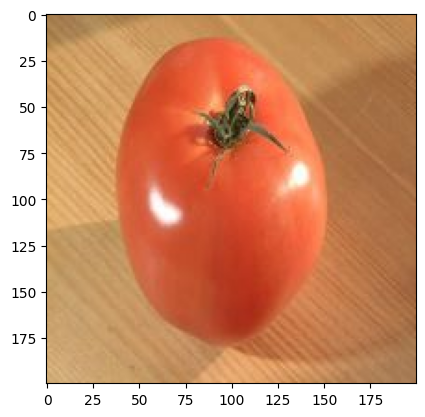

In [16]:
plot(img)

#### 2. Image properties

In [17]:
img_mat = cv2.Mat(img)

In [20]:
# shape of the image :
img_mat.shape

(200, 200, 3)

Here we have 200 rows, and 200 columns, the last number is number of channels means (RED, BLUE, GREEN).

In [21]:
# data type of the image :
img_mat.dtype

dtype('uint8')

This gives the data type of image, 'uint8' means is unsigned integer, image is coded in 8 bit.

#### 3. Image Hist :

##### a. Fist method :

In [38]:
# method that calculate occurence of certain pixel.
def pxl_occ(img, ch, pxl):
    img_ch = img[:,:,ch]
    return img_ch[img_ch==pxl].sum()

In [55]:
def get_hist_dict_img(img):
    return (np.array(list({i : pxl_occ(img, j,i) for i in range(256)}.items())) for j in range(3))

In [56]:
hist_r, hist_g, hist_b = get_hist_dict_img(img)

### Plot Historgram using calcHist method :

In [66]:
hists = (cv2.calcHist([img],[i],None,[256],[0,256]) for i in range(3))

In [67]:
hist_r, hist_g, hist_b = hists

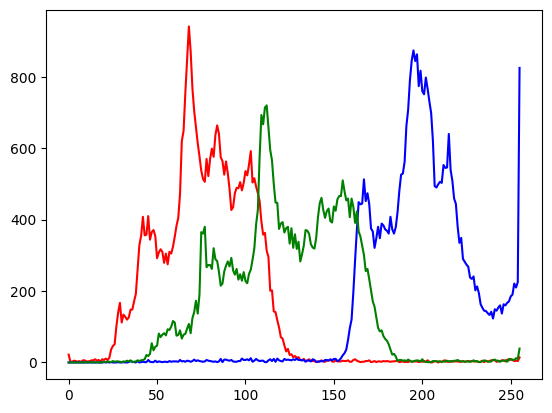

In [75]:
# Red channel, plot hist
plt.plot(hist_r, color="r")
plt.plot(hist_b, color="b")
plt.plot(hist_g, color="g")

##### Compare between Histograms :

In [78]:
# red with green
cv2.compareHist(hist_r, hist_g, cv2.HISTCMP_BHATTACHARYYA)

0.5685022207541667

In [79]:
# red with blue
cv2.compareHist(hist_r, hist_b, cv2.HISTCMP_BHATTACHARYYA)

0.9086064968674809

In [80]:
# blue with green
cv2.compareHist(hist_b, hist_g, cv2.HISTCMP_BHATTACHARYYA)

0.8077275534874325

### Mean :

In [81]:
def mean(img ,ch):
    m,n = img.shape[:-1]
    return img[:, :, ch].sum() * (1/(m*n))

In [87]:
# mean of red channel :
mean(img, 0)

77.99985000000001

In [88]:
# mean of green channel :
mean(img, 1)

122.99627500000001

In [89]:
# mean of blue channel :
mean(img, 2)

200.00490000000002

### grayscale :

##### a. gray=(R+G+B)/3

In [118]:
def gray_img(img):
    img_g = img[:,:,0] + img[:,:,1] + img[:,:,2] 
    return img_g / 3

In [119]:
img_g = gray_img(img)

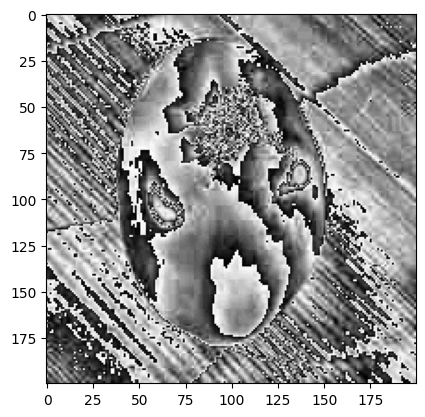

In [120]:
plt.imshow(img_g, cmap='gray')

 ##### b cvtColor

In [121]:
img_g2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

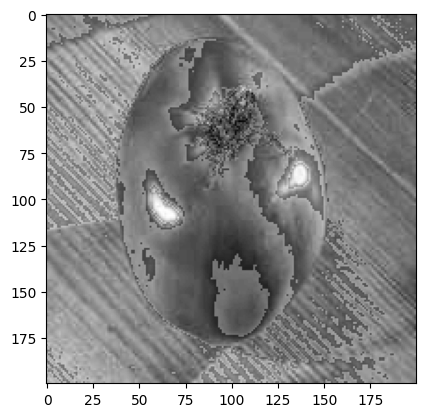

In [122]:
plt.imshow(img_g2, cmap='gray')

### 